In [1]:
import matplotlib.pyplot as plt                                 # low level visualization library
import seaborn as sns                                           # higher level visualization library compared to matplotlib

from sklearn.model_selection import train_test_split            # library for splitting data before modeling 
from sklearn.linear_model import LinearRegression               # library with linear model for machine learning
from sklearn.metrics import mean_absolute_error, r2_score       # library for metrics for evaluating results of the model
from yellowbrick.regressor import ResidualsPlot                 # library for visualizing result of your model. Install through Anaconda terminal using: pip install yellowbrick

import statsmodels.api as sm                                    # library with linear model for statistical inference    
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer,PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

C:\Users\karti\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.5f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [20, 10]
# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

# Exploratory data quality report reflecting the following

In [3]:
df=pd.read_csv('concrete.csv')

In [4]:
#There are no predictor variables so I dont have to remove any variable
df.head()

cement      slag       ash     water  superplastic   coarseagg   fineagg  \
0 141.30000 212.00000   0.00000 203.50000       0.00000   971.80000 748.50000   
1 168.90000  42.20000 124.30000 158.30000      10.80000 1,080.80000 796.20000   
2 250.00000   0.00000  95.70000 187.40000       5.50000   956.90000 861.20000   
3 266.00000 114.00000   0.00000 228.00000       0.00000   932.00000 670.00000   
4 154.80000 183.40000   0.00000 193.30000       9.10000 1,047.40000 696.70000   

   age  strength  
0   28  29.89000  
1   14  23.51000  
2   28  29.22000  
3   28  45.85000  
4   28  18.29000

In [5]:
df.shape

(1030, 9)

In [6]:
#There are no missing values in any of the columns and no garbage data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.describe()

cement        slag         ash       water  superplastic  \
count 1,030.00000 1,030.00000 1,030.00000 1,030.00000   1,030.00000   
mean    281.16786    73.89583    54.18835   181.56728       6.20466   
std     104.50636    86.27934    63.99700    21.35422       5.97384   
min     102.00000     0.00000     0.00000   121.80000       0.00000   
25%     192.37500     0.00000     0.00000   164.90000       0.00000   
50%     272.90000    22.00000     0.00000   185.00000       6.40000   
75%     350.00000   142.95000   118.30000   192.00000      10.20000   
max     540.00000   359.40000   200.10000   247.00000      32.20000   

        coarseagg     fineagg         age    strength  
count 1,030.00000 1,030.00000 1,030.00000 1,030.00000  
mean    972.91893   773.58049    45.66214    35.81796  
std      77.75395    80.17598    63.16991    16.70574  
min     801.00000   594.00000     1.00000     2.33000  
25%     932.00000   730.95000     7.00000    23.71000  
50%     968.00000   779.50000    28.00000    34.44500  
75%   1,029.40000   824.00000    56.00000    46.13500  
max   1,145.00000   992.60000   365.00000    82.60000

In [8]:
#If skewness is less than -1 or greater than 1, the distribution is highly skewed.
#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
#If skewness is between -0.5 and 0.5, the distribution is approximately symmetric
# We will have to handle skewness of age and superplastic
df.skew()

cement          0.50948
slag            0.80072
ash             0.53735
water           0.07463
superplastic    0.90720
coarseagg      -0.04022
fineagg        -0.25301
age             3.26918
strength        0.41698
dtype: float64

In [9]:
profile = df.profile_report(html={'style':{'full_width':True}})    #syntax for v2.6 version of pandas_profiling that works with pandas v1.0+
profile

# Univariate analysis

In [10]:
fieldDescription = {
  "cement": "Cement kg in a m3 mixture",
  "slag": "Blast Furnace Slag kg in a m3 mixture",
  "ash": "Fly Ash kg in a m3 mixture",
  "water" :"Water kg in a m3 mixture",
  "superplastic":"Superplasticizer kg in a m3 mixture",
  "coarseagg":"Coarse Aggregate kg in a m3 mixture",
  "fineagg":"Fine Aggregate kg in a m3 mixture",
  "age":"Age in Days (1~365)",
  "strength":"Concrete compressive strength"
}

In [11]:
def findOutliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    median = df[column].quantile(0.50)
    mean=df[column].mean()
    IQR = Q3 - Q1
    skewed='NotSkewed';
    
    if(mean>median):
        skewed='RightSkewed'
    elif (mean<median):
        skewed='LeftSkewed'
    
    df_new = pd.DataFrame(columns=['Field','Description', 'Total No of Data','Min','Max','Mean','Median(Q2)','Std Dev','Q1','Q3','Total No of Missing','Total Number of Outliers','Skewed','Lowerbound','UpperBound','No of Outliers under lowerbound','No of Outliers above Upperbound'])
    df_new=df_new.append({'Field':column,
                             'Description':fieldDescription[column],
                             'Total No of Data':df[column].count()   ,
                              'Min':df[column].min()   ,
                              'Max':df[column].max()   ,
                              'Mean':mean,
                              'Median(Q2)':median,
                              'Std Dev':df[column].std(),
                              'Q1':Q1,
                              'Q3':Q3,
                              'Total No of Missing':df[column].isnull().sum(),
                             'Total Number of Outliers': df[(df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR))][column].count(),
                             'Lowerbound': Q1 - 1.5 * IQR,
                             'UpperBound': Q3 + 1.5 * IQR,
                             'No of Outliers under lowerbound':df[df[column] < (Q1 - 1.5 * IQR)][column].count(),
                             'No of Outliers above Upperbound' :df[df[column] > (Q3 + 1.5 * IQR)][column].count(),
                             'Skewed':skewed
                               },
                            ignore_index=True)
  
    return df_new

In [12]:
cement_data=findOutliers('cement')
slag_data=findOutliers('slag')
ash_data=findOutliers('ash')
water_data=findOutliers('water')
superplastic_data=findOutliers('superplastic')
coarseagg_data=findOutliers('coarseagg')
fineagg_data=findOutliers('fineagg')
age_data=findOutliers('age')
strength_data=findOutliers('strength')
pd.concat([cement_data,slag_data,ash_data,water_data,superplastic_data,coarseagg_data,fineagg_data,age_data,strength_data])

Field                            Description Total No of Data  \
0        cement              Cement kg in a m3 mixture             1030   
0          slag  Blast Furnace Slag kg in a m3 mixture             1030   
0           ash             Fly Ash kg in a m3 mixture             1030   
0         water               Water kg in a m3 mixture             1030   
0  superplastic    Superplasticizer kg in a m3 mixture             1030   
0     coarseagg    Coarse Aggregate kg in a m3 mixture             1030   
0       fineagg      Fine Aggregate kg in a m3 mixture             1030   
0           age                    Age in Days (1~365)             1030   
0      strength          Concrete compressive strength             1030   

        Min         Max      Mean  Median(Q2)   Std Dev        Q1          Q3  \
0 102.00000   540.00000 281.16786   272.90000 104.50636 192.37500   350.00000   
0   0.00000   359.40000  73.89583    22.00000  86.27934   0.00000   142.95000   
0   0.00000   200.10000  54.18835     0.00000  63.99700   0.00000   118.30000   
0 121.80000   247.00000 181.56728   185.00000  21.35422 164.90000   192.00000   
0   0.00000    32.20000   6.20466     6.40000   5.97384   0.00000    10.20000   
0 801.00000 1,145.00000 972.91893   968.00000  77.75395 932.00000 1,029.40000   
0 594.00000   992.60000 773.58049   779.50000  80.17598 730.95000   824.00000   
0         1         365  45.66214    28.00000  63.16991   7.00000    56.00000   
0   2.33000    82.60000  35.81796    34.44500  16.70574  23.71000    46.13500   

  Total No of Missing Total Number of Outliers       Skewed  Lowerbound  \
0                   0                        0  RightSkewed   -44.06250   
0                   0                        2  RightSkewed  -214.42500   
0                   0                        0  RightSkewed  -177.45000   
0                   0                        9   LeftSkewed   124.25000   
0                   0                       10   LeftSkewed   -15.30000   
0                   0                        0  RightSkewed   785.90000   
0                   0                        5   LeftSkewed   591.37500   
0                   0                       59  RightSkewed   -66.50000   
0                   0                        4  RightSkewed    -9.92750   

   UpperBound No of Outliers under lowerbound No of Outliers above Upperbound  
0   586.43750                               0                               0  
0   357.37500                               0                               2  
0   295.75000                               0                               0  
0   232.65000                               5                               4  
0    25.50000                               0                              10  
0 1,175.50000                               0                               0  
0   963.57500                               0                               5  
0   129.50000                               0                              59  
0    79.77250                               0                               4

As seen above in df.skew(),we need to take care of skewnees in age and superplastic.Rest we will standardize the variable

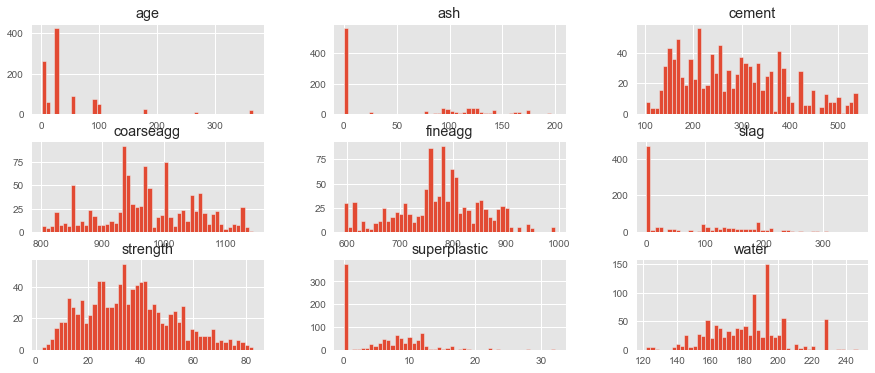

In [13]:
import matplotlib.pyplot as plt
df[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']].hist(bins=50,figsize=(15,6));
plt.show();

# Univariate Conclusion

1)There are no missing values to impute 2)But there are lot of zeroes in slag(471,45.7%),ash(566,56%),superplastic(379,36%).Will have to keep it as is for now and check performance.If not then replace these zeroes with median .If we replace zeroes with medians then we will have to check skewness for these fields again. 3)From skewness,we see age(3.269177) and superplastic(0.907203) are highly skewed.We may have to apply log Transform for these fields to reduce the skewness during cross validation in a pipeline. 4)We will have to apply standardSCaler to all the fields except the above two during cross validation in a pipeline 5)Lets check correlation in Bivariate ANalysis to see if there are any independent fields correlated

# Bivariate Analysis

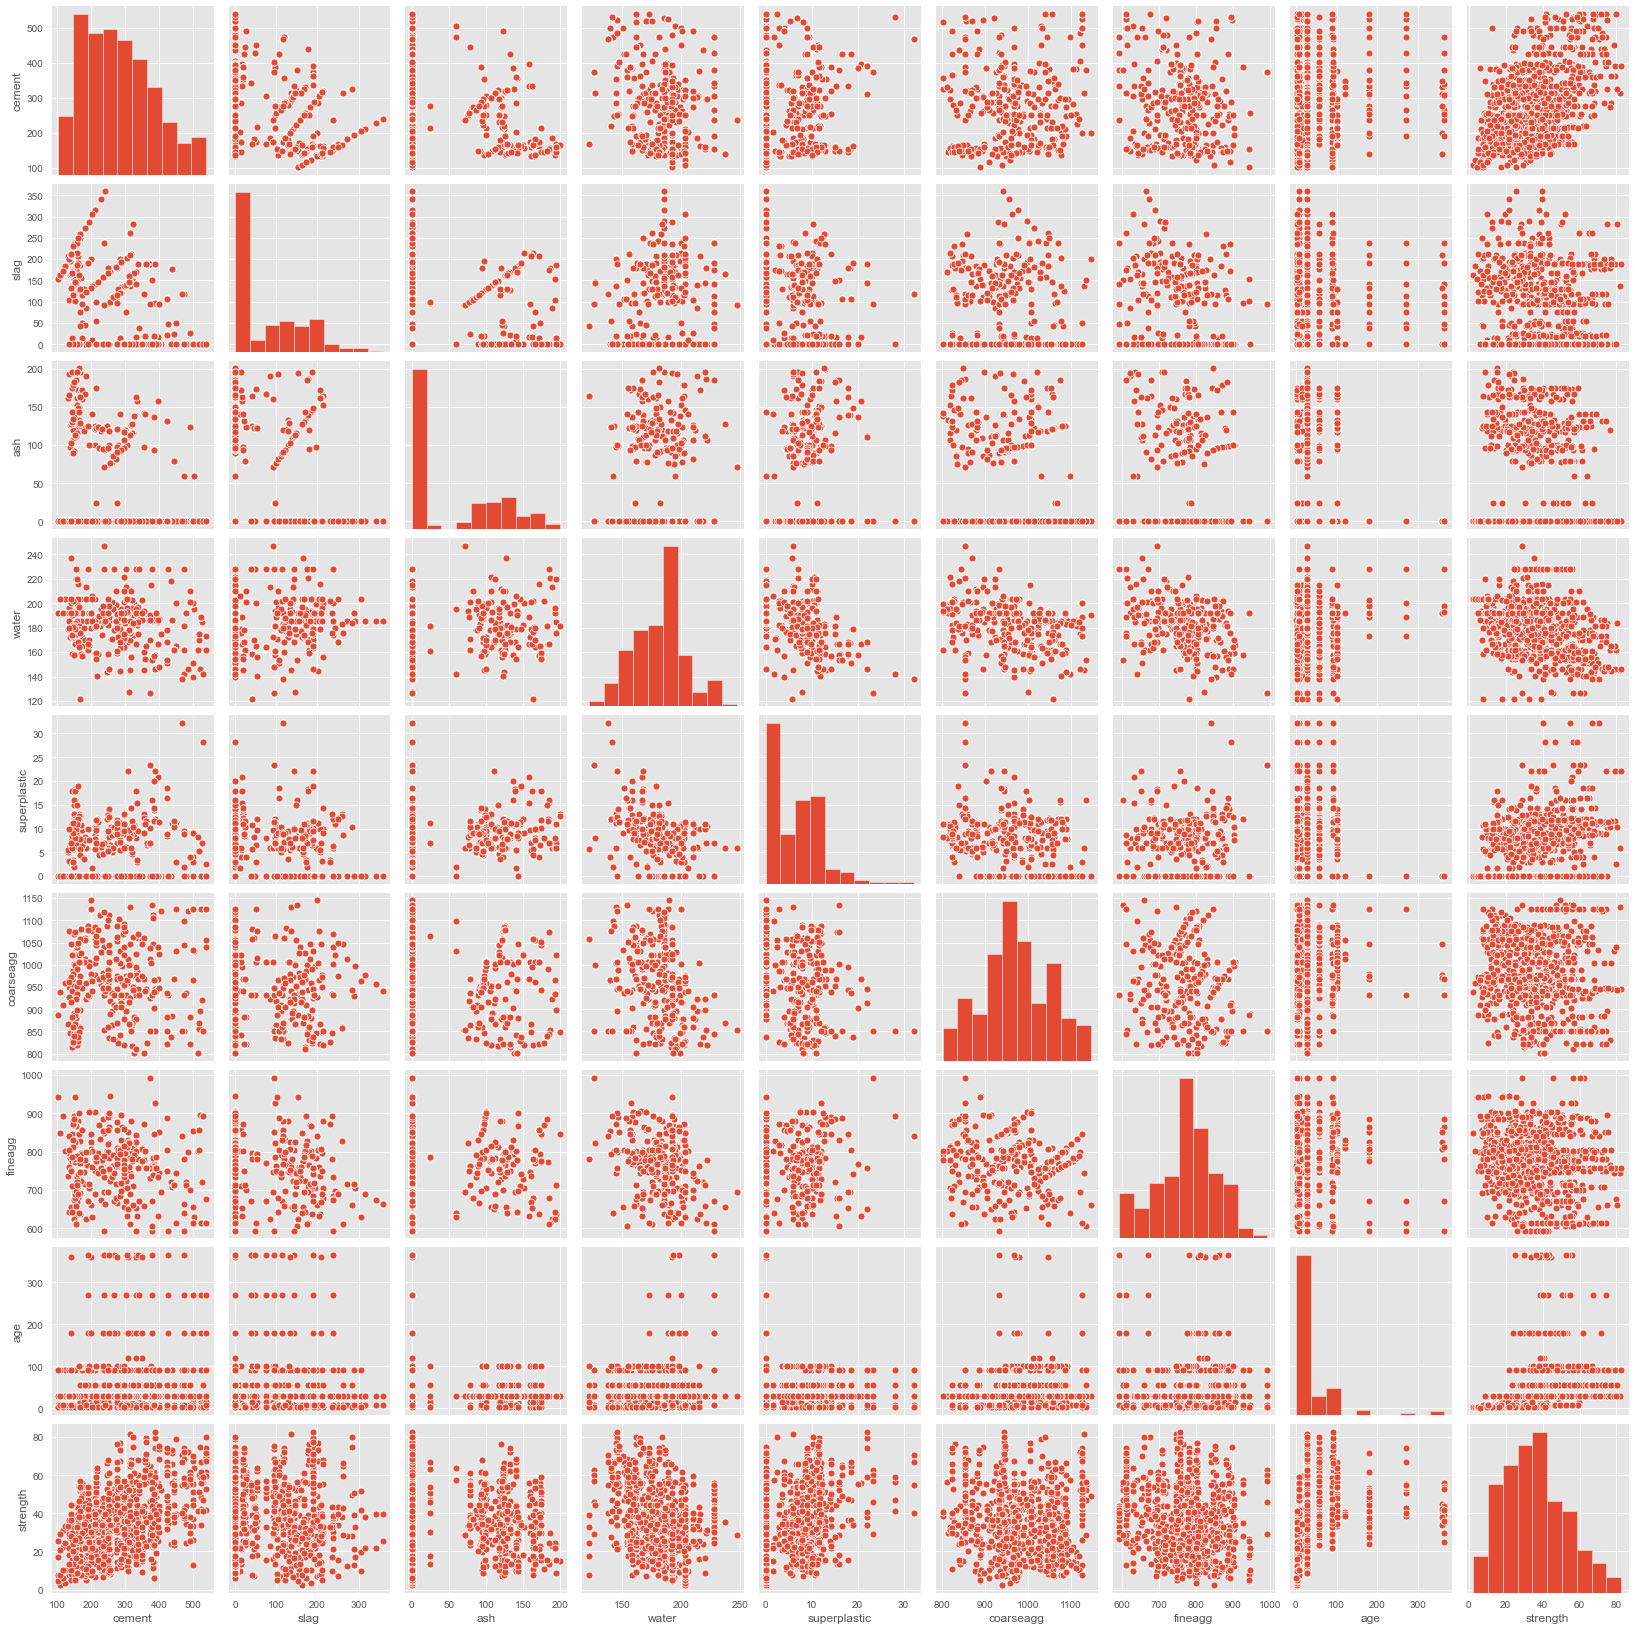

In [14]:
sns.pairplot(df)

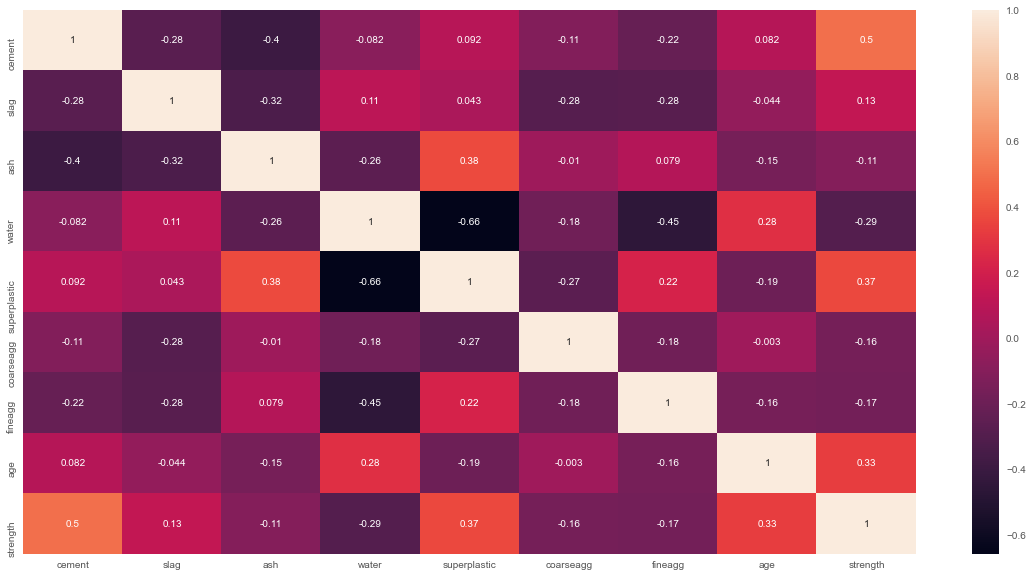

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
#None of the variable has a strong relation with Strength which is a Target variable.Only Cement seems to have a  moderate relationship with Strength 
corr_matrix = df.corr()
corr_matrix['strength'].sort_values(ascending=False)

strength        1.00000
cement          0.49783
superplastic    0.36608
age             0.32887
slag            0.13483
ash            -0.10575
coarseagg      -0.16493
fineagg        -0.16724
water          -0.28963
Name: strength, dtype: float64

# Conclusion of Bivariate Analysis

#Considering 0.8 to be a Strong Correlation factor
1)None of the variable has a strong relation with Strength which is a Target variable.Only Cement seems to have a  moderate relationship with Strength 
2)Water is moderately correlated to superplastic and fineagg


# Feature Engineering

# Split the Data into Train test validate and apply Feature Engineering

In [17]:
X=df.drop('strength',axis=1)
y=df['strength']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [19]:
X_train_split,X_valid,y_train_split,y_valid = train_test_split(X_train,y_train,test_size=0.2,random_state=7)
X_train_split.shape,X_valid.shape,y_train_split.shape,y_valid.shape

((659, 8), (165, 8), (659,), (165,))

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 15 to 175
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        824 non-null    float64
 1   slag          824 non-null    float64
 2   ash           824 non-null    float64
 3   water         824 non-null    float64
 4   superplastic  824 non-null    float64
 5   coarseagg     824 non-null    float64
 6   fineagg       824 non-null    float64
 7   age           824 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 57.9 KB


# FEATURE SELECTION using Backward Elimination, SequentialFeatureSelector,RFE,LASSOCV

#In case of Regression,its better to apply STandardScaler and then check for feature importance

In [21]:
#Backward Elimination
cols = list(X_train_split.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train_split[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train_split,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['cement', 'slag', 'ash', 'water', 'superplastic', 'age']


In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Build Lin Reg  to use in feature selection
linR = LinearRegression()

# Sequential Forward Selection
sfs = SFS(linR, 
          k_features=(1, 8), 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5,
          n_jobs=-1)

pipe = make_pipeline(StandardScaler(), sfs)
pipe.fit(X_train_split, y_train_split)


print('\nSequential Forward Selection :')
print('best combination (ACC: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))
#print('all subsets:\n', sfs.subsets_)
#plot_sfs(sfs.get_metric_dict(), kind='std_err');


###################################################

# Sequential Backward Selection
sbs = SFS(linR, 
          k_features=(1, 8), 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5,
          n_jobs=-1)
pipe = make_pipeline(StandardScaler(), sbs)
pipe.fit(X_train_split, y_train_split)

print('\nSequential Backward Selection :')
print('best combination (ACC: %.3f): %s\n' % (sbs.k_score_, sbs.k_feature_idx_))
#plot_sfs(sbs.get_metric_dict(), kind='std_err');

###################################################

# Sequential Forward Floating Selection
sffs = SFS(linR, 
           k_features=(1, 8),  
           forward=True, 
           floating=True, 
           scoring='neg_mean_squared_error',
           cv=5,
           n_jobs=-1)
pipe = make_pipeline(StandardScaler(), sffs)
pipe.fit(X_train_split, y_train_split)


print('\nSequential Forward Floating Selection :')
print('best combination (ACC: %.3f): %s\n' % (sffs.k_score_, sffs.k_feature_idx_))
#plot_sfs(sffs.get_metric_dict(), kind='std_err');

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(linR, 
           k_features=(1, 8), 
           forward=False, 
           floating=True, 
           scoring='neg_mean_squared_error',
           cv=5,
           n_jobs=-1)
sbfs = sbfs.fit(X_train_split, y_train_split)

print('\nSequential Backward Floating Selection :')
print('best combination (ACC: %.3f): %s\n' % (sbfs.k_score_, sbfs.k_feature_idx_))
print(X_train_split.columns[0])
#plot_sfs(sbfs.get_metric_dict(), kind='std_err');


Sequential Forward Selection :
best combination (ACC: -117.563): (0, 1, 2, 3, 4, 7)


Sequential Backward Selection :
best combination (ACC: -117.563): (0, 1, 2, 3, 4, 7)


Sequential Forward Floating Selection :
best combination (ACC: -117.563): (0, 1, 2, 3, 4, 7)


Sequential Backward Floating Selection :
best combination (ACC: -117.563): (0, 1, 2, 3, 4, 7)

cement


In [23]:
X_train_split.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

Based on the FeatureSelection Method,['cement', 'slag', 'ash', 'water', 'superplastic', 'age'] are important and 'coarseagg', 'fineagg' are removed

# RFE (Recursive Feature Elimination)

In [24]:
from sklearn.svm import LinearSVR
from sklearn.feature_selection import RFE
estimator=LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)

regr = make_pipeline(StandardScaler(),selector)

pipeselector = regr.fit(X_train_split, y_train_split)
print(pipeselector.named_steps['rfe'].ranking_)

[1 1 1 1 2 3 4 1]


# LASSOCV

Best alpha using built-in LassoCV: 0.854049
Best score using built-in LassoCV: 0.591156
Lasso picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

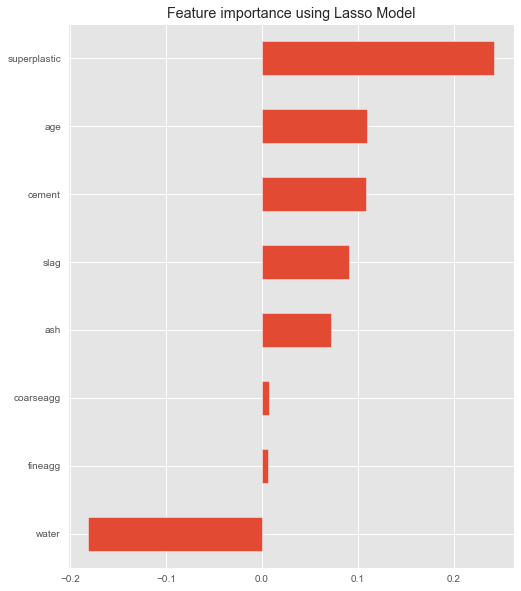

In [25]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X_train_split, y_train_split)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train_split,y_train_split))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Conclusion Based on Feature Selection

1)Based on all the 4 methods above ['cement', 'slag', 'ash', 'water', 'superplastic', 'age'] are important and 'coarseagg', 'fineagg' are not that important <br/>
2)Will have to run the model with all  the fields and without 2 fields and check the performance of the model

# Model Selection based on Cross_val_score using 5 folds

1)Select Model based on all the fields and check cv score<br>
2)Select model based on only  ['cement', 'slag', 'ash', 'water', 'superplastic', 'age'] based on FeatureSelection and check cv score<br>
3)Select Model based on PolynomialFeature as part of Feature extraction and check cv score<br>

# Select Model based on all the fields and check cv score

In [26]:
import warnings; warnings.simplefilter('ignore')

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoLars
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import make_pipeline
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)


def quick_eval(pipeline, X_train, y_train,X_test,y_test , verbose=True):
    """
    Quickly trains modeling pipeline and evaluates on test data. Returns original model, training RMSE, and testing
    RMSE as a tuple.
    """
    
   
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) 
    #clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
    scores =cross_val_score(pipeline, X_train, y_train, cv=cv,scoring='neg_mean_squared_error')
    #print(f"Regression algorithm: {pipeline.named_steps['regressor'].__class__.__name__}")
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    return  pipeline.named_steps['regressor'].__class__.__name__,scores.mean(), scores.std() * 2
    
   
regressors = [
    LinearRegression(),
    Lasso(alpha=.5),
    Ridge(alpha=.1),
    LassoLars(alpha=.1),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]



# Creating an empty Dataframe with column names only
resultsDfwithallColumns = pd.DataFrame(columns=['Method', 'MSE All columns', 'STD Dev'])

for r in regressors:
    pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', r)
    ])

    eval_scores=quick_eval(pipe, X_train_split, y_train_split,X_valid,y_valid)
    resultsDfwithallColumns = resultsDfwithallColumns.append({'Method': eval_scores[0], 
                          'MSE All columns': eval_scores[1], 
                          'STD Dev': eval_scores[2]
                         },ignore_index=True)
    #print()

    
# Store performance scores of the model in a dataframe for comparison
resultsDfwithallColumns


Method  MSE All columns  STD Dev
0           LinearRegression        -61.33800 15.62990
1                      Lasso        -62.97395 16.98700
2                      Ridge        -61.33832 15.62579
3                  LassoLars        -93.73816 25.03368
4      DecisionTreeRegressor        -75.73492 30.06366
5      RandomForestRegressor        -41.68040  5.39648
6          AdaBoostRegressor        -72.79572 11.84327
7  GradientBoostingRegressor        -37.24225  5.79636

# Select model based on only ['cement', 'slag', 'ash', 'water', 'superplastic', 'age'] based on FeatureSelection and check cv score

In [27]:
featurestoSelect =['cement', 'slag', 'ash', 'water', 'superplastic', 'age']
X_train_split[featurestoSelect]

cement      slag       ash     water  superplastic  age
486 427.50000  47.50000   0.00000 228.00000       0.00000   28
62  194.70000   0.00000 100.50000 165.60000       7.50000  100
438 213.80000  98.10000  24.50000 181.70000       6.70000   14
982 284.00000 119.70000   0.00000 168.30000       7.20000   28
77  165.00000 128.50000 132.10000 175.10000       8.10000    3
..        ...       ...       ...       ...           ...  ...
519 349.00000   0.00000   0.00000 192.00000       0.00000   90
972 167.40000 129.90000 128.60000 175.50000       7.80000    3
416 333.00000   0.00000   0.00000 192.00000       0.00000   90
371 212.50000   0.00000 100.40000 159.30000       8.70000   28
686 143.80000 136.30000 106.20000 178.10000       7.50000   28

[659 rows x 6 columns]

In [28]:
# Creating an empty Dataframe with column names only
resultsDfwithSelectedColumns = pd.DataFrame(columns=['Method', 'MSE Selected columns', 'STD Dev'])


for r in regressors:
    pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', r)
    ])

    eval_scores=quick_eval(pipe, X_train_split[featurestoSelect], y_train_split,X_valid[featurestoSelect],y_valid)
    resultsDfwithSelectedColumns = resultsDfwithSelectedColumns.append({'Method': eval_scores[0], 
                          'MSE Selected columns': eval_scores[1], 
                          'STD Dev': eval_scores[2]
                         },ignore_index=True)
    #print()

    
resultsDfwithSelectedColumns

Method  MSE Selected columns  STD Dev
0           LinearRegression             -61.53874 16.15167
1                      Lasso             -63.86251 17.93744
2                      Ridge             -61.54060 16.15261
3                  LassoLars             -93.73816 25.03368
4      DecisionTreeRegressor             -67.68226 36.98598
5      RandomForestRegressor             -39.67900  9.92628
6          AdaBoostRegressor             -68.50527 13.97771
7  GradientBoostingRegressor             -38.04659  9.50397

In [29]:
result = pd.concat([resultsDfwithallColumns, resultsDfwithSelectedColumns.drop('Method',axis=1)], axis=1, join='inner')
result

Method  MSE All columns  STD Dev  MSE Selected columns  \
0           LinearRegression        -61.33800 15.62990             -61.53874   
1                      Lasso        -62.97395 16.98700             -63.86251   
2                      Ridge        -61.33832 15.62579             -61.54060   
3                  LassoLars        -93.73816 25.03368             -93.73816   
4      DecisionTreeRegressor        -75.73492 30.06366             -67.68226   
5      RandomForestRegressor        -41.68040  5.39648             -39.67900   
6          AdaBoostRegressor        -72.79572 11.84327             -68.50527   
7  GradientBoostingRegressor        -37.24225  5.79636             -38.04659   

   STD Dev  
0 16.15167  
1 17.93744  
2 16.15261  
3 25.03368  
4 36.98598  
5  9.92628  
6 13.97771  
7  9.50397

# Select Model based on PolynomialFeature as part of Feature extraction and check cv score

In [30]:
# Creating an empty Dataframe with column names only
resultsDfwithPolyColumns = pd.DataFrame(columns=['Method', 'MSE Polynomial columns', 'STD Dev'])

preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    PolynomialFeatures(degree=3),
    PowerTransformer(method = 'yeo-johnson', standardize = False)
    #StandardScaler()
    #RobustScaler()
)


for r in regressors:
    pipe = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', r)
    ])

    eval_scores=quick_eval(pipe, X_train_split, y_train_split,X_valid,y_valid)
    resultsDfwithPolyColumns = resultsDfwithPolyColumns.append({'Method': eval_scores[0], 
                          'MSE Polynomial columns': eval_scores[1], 
                          'STD Dev': eval_scores[2]
                         },ignore_index=True)
    #print()
    
resultsDfwithPolyColumns

Method  MSE Polynomial columns  STD Dev
0           LinearRegression               -58.37603 23.31351
1                      Lasso               -53.29582 13.84784
2                      Ridge               -45.84673 24.84839
3                  LassoLars               -84.48105 18.42245
4      DecisionTreeRegressor               -73.17081 19.09124
5      RandomForestRegressor               -39.89605  8.03500
6          AdaBoostRegressor               -61.59829 12.49384
7  GradientBoostingRegressor               -34.14315  4.87661

In [31]:
result = pd.concat([result, resultsDfwithPolyColumns.drop('Method',axis=1)], axis=1, join='inner')
result

Method  MSE All columns  STD Dev  MSE Selected columns  \
0           LinearRegression        -61.33800 15.62990             -61.53874   
1                      Lasso        -62.97395 16.98700             -63.86251   
2                      Ridge        -61.33832 15.62579             -61.54060   
3                  LassoLars        -93.73816 25.03368             -93.73816   
4      DecisionTreeRegressor        -75.73492 30.06366             -67.68226   
5      RandomForestRegressor        -41.68040  5.39648             -39.67900   
6          AdaBoostRegressor        -72.79572 11.84327             -68.50527   
7  GradientBoostingRegressor        -37.24225  5.79636             -38.04659   

   STD Dev  MSE Polynomial columns  STD Dev  
0 16.15167               -58.37603 23.31351  
1 17.93744               -53.29582 13.84784  
2 16.15261               -45.84673 24.84839  
3 25.03368               -84.48105 18.42245  
4 36.98598               -73.17081 19.09124  
5  9.92628               -39.89605  8.03500  
6 13.97771               -61.59829 12.49384  
7  9.50397               -34.14315  4.87661

# Model Selection Conclusion

1)Based on the above table,I will be using RandomForestRegressor and GradientBoostingRegressor as my initial model to tune <br>


In [32]:
df.head()

cement      slag       ash     water  superplastic   coarseagg   fineagg  \
0 141.30000 212.00000   0.00000 203.50000       0.00000   971.80000 748.50000   
1 168.90000  42.20000 124.30000 158.30000      10.80000 1,080.80000 796.20000   
2 250.00000   0.00000  95.70000 187.40000       5.50000   956.90000 861.20000   
3 266.00000 114.00000   0.00000 228.00000       0.00000   932.00000 670.00000   
4 154.80000 183.40000   0.00000 193.30000       9.10000 1,047.40000 696.70000   

   age  strength  
0   28  29.89000  
1   14  23.51000  
2   28  29.22000  
3   28  45.85000  
4   28  18.29000

# Checking number of Zeroes

In [33]:
#slag(471,45.7%),ash(566,56%),superplastic(379,36%).
len(df[(df['superplastic']==0) | (df['ash']==0) | (df['slag']==0)])

805

In [34]:
#slag(471,45.7%),ash(566,56%),superplastic(379,36%).
len(df[(df['superplastic']==0) & (df['ash']==0) & (df['slag']==0)])

209

We cant randomly replace the above zeroes with mean as there are lot of zeroes and  we cant drop the rows as we will loose lot of data.
So we will have to keep it as is and tune our models.
Best way to replace the zeroes is to collect the data from the source.

# Model Tuning using GridSearchCV,RandomSearchCV and Bayesian Optimization

In [35]:
#!pip install bayesian-optimization 
#from bayes_opt import BayesianOptimization

In [36]:
from sklearn.metrics import mean_squared_error
def evaluate_model(model): 
    
    mse_train = mean_squared_error(y_train_split, model.predict(X_train_split))
    mse_test = mean_squared_error(y_valid, model.predict(X_valid))
        
    return mse_train, mse_test

In [37]:
from sklearn.model_selection import GridSearchCV

preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    PowerTransformer(method = 'yeo-johnson', standardize = False),
    StandardScaler()
    #RobustScaler()
)

selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', RandomForestRegressor(random_state=20,n_estimators=20))
                 ])



selector_pipeline.fit(X_train_split, y_train_split);

modeltuningresults = pd.DataFrame(columns=['Method', 'MSE Train','MSE Valid'])


scores = evaluate_model(selector_pipeline)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "Base RandomForestRegressor", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', RandomForestRegressor(random_state=20,n_estimators=200))
                 ])
modeltuningresults

Method  MSE Train  MSE Valid
0  Base RandomForestRegressor    5.94594   26.57853

In [38]:
from sklearn.model_selection import GridSearchCV


selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', RandomForestRegressor(random_state=20,n_estimators=200))
                 ])


param_grid = {
     'regressor__max_features': [5,6,7,8],
     'regressor__max_depth': [3,4,5,6,7,8,9,10],   
     'regressor__n_estimators':[50,100,150,200]
 }

gridsearch = GridSearchCV(selector_pipeline, 
                           param_grid, 
                           scoring = 
                           'neg_mean_squared_error', 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = True)

gridsearch.fit(X_train_split, y_train_split);


print(f"The best estimator had RMSE {(gridsearch.best_score_)} and the following parameters:")
print(f"The best estimator had RMSE {np.sqrt(-gridsearch.best_score_)} and the following parameters:")
print(gridsearch.best_params_)

scores = evaluate_model(gridsearch.best_estimator_)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "GridSearchCV RandomForestRegressor", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', RandomForestRegressor(random_state=20,n_estimators=200))
                 ])
modeltuningresults

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   26.6s finished


The best estimator had RMSE -35.8195539828054 and the following parameters:
The best estimator had RMSE 5.984943941492301 and the following parameters:
{'regressor__max_depth': 10, 'regressor__max_features': 5, 'regressor__n_estimators': 200}


Method  MSE Train  MSE Valid
0          Base RandomForestRegressor    5.94594   26.57853
1  GridSearchCV RandomForestRegressor    6.64813   26.92014

In [39]:
from sklearn.model_selection import RandomizedSearchCV


selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', RandomForestRegressor(random_state=20,n_estimators=200))
                 ])


param_grid = {
     'regressor__max_features': range(3,8),
     'regressor__max_depth': range(1,5),   
     'regressor__n_estimators':range(1,50)
 }
 

gridsearch = RandomizedSearchCV(selector_pipeline, 
                           param_grid, 
                           scoring = 
                           'neg_mean_squared_error', 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = True)

gridsearch.fit(X_train_split, y_train_split);

print(f"The RandomizedSearchCV best estimator had RMSE {(gridsearch.best_score_)} and the following parameters:")
print(f"The RandomizedSearchCV best estimator had RMSE {np.sqrt(-gridsearch.best_score_)} and the following parameters:")
print(gridsearch.best_params_)

scores = evaluate_model(gridsearch.best_estimator_)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "RandomizedSearchCV RandomForestRegressor", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The RandomizedSearchCV best estimator had RMSE -69.36754044018141 and the following parameters:
The RandomizedSearchCV best estimator had RMSE 8.328717814896926 and the following parameters:
{'regressor__n_estimators': 46, 'regressor__max_features': 5, 'regressor__max_depth': 4}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


Method  MSE Train  MSE Valid
0                Base RandomForestRegressor    5.94594   26.57853
1        GridSearchCV RandomForestRegressor    6.64813   26.92014
2  RandomizedSearchCV RandomForestRegressor   53.80229   65.90435

In [40]:
from bayes_opt import BayesianOptimization

# Define the model
def rf_bo(max_depth, n_estimators, max_features):
    rf = RandomForestRegressor(n_estimators = int(n_estimators), 
                                max_depth = int(max_depth), 
                                max_features = int(max_features),
                                random_state = 2)
    rf.fit(X_train_split, y_train_split)
    return mean_squared_error(y_train_split, rf.predict(X_train_split))

# Set a hyperparameter search space
parameters={'max_depth' : (1,10),
            'n_estimators': (10,100),
            'max_features': (1,8)}

# Run a hyperparameter seach
BO = BayesianOptimization(rf_bo, parameters, random_state=1)
BO.maximize()
BO.max

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        |  55.1     |  4.753    |  6.042    |  10.01    |
|  2        |  101.3    |  3.721    |  2.027    |  18.31    |
|  3        |  125.0    |  2.676    |  3.419    |  45.71    |
|  4        |  39.2     |  5.849    |  3.934    |  71.67    |
|  5        |  117.6    |  2.84     |  7.147    |  12.46    |
|  6        |  53.54    |  4.383    |  6.529    |  79.7     |
|  7        |  35.27    |  5.791    |  6.512    |  25.74    |
|  8        |  34.78    |  6.363    |  2.827    |  77.21    |
|  9        |  100.6    |  3.048    |  2.089    |  95.26    |
|  10       |  15.68    |  7.536    |  6.1      |  27.52    |
|  11       |  125.0    |  2.729    |  3.397    |  45.75    |
|  12       |  125.0    |  2.664    |  3.432    |  45.8     |
|  13       |  125.0    |  2.644    |  3.328    |  45.76    |
|  14       |  125.0    |  2.67     |  3.383    |  45.76    |
|  15   

{'target': 139.94432625376146,
 'params': {'max_depth': 2.7986050212705944,
  'max_features': 2.9120130434095204,
  'n_estimators': 45.92382419514635}}

In [41]:
# Random Forest Classifier with tuned parameters
rfbo = RandomForestRegressor(max_depth = 3, max_features = 3,  n_estimators = 46, random_state = 20).fit(X_train_split, y_train_split)

# Create models scores for train and test sets
scores = evaluate_model(rfbo)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "Bayesian Optimization RandomForestRegressor", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults


Method  MSE Train  MSE Valid
0                   Base RandomForestRegressor    5.94594   26.57853
1           GridSearchCV RandomForestRegressor    6.64813   26.92014
2     RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3  Bayesian Optimization RandomForestRegressor   89.25304  104.18669

In [42]:
from sklearn.model_selection import GridSearchCV


selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', GradientBoostingRegressor(random_state=20,n_estimators=20))
                 ])





selector_pipeline.fit(X_train_split, y_train_split);



scores = evaluate_model(selector_pipeline)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "Base GradientBoostingRegressor", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                   Base RandomForestRegressor    5.94594   26.57853
1           GridSearchCV RandomForestRegressor    6.64813   26.92014
2     RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3  Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4               Base GradientBoostingRegressor   55.10381   67.05555

In [43]:
from sklearn.model_selection import GridSearchCV


selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', GradientBoostingRegressor(random_state=20,n_estimators=200))
                 ])


param_grid = {
     'regressor__max_features': [5,6,7,8],
     'regressor__max_depth': [3,4,5,6,7,8,9,10],   
     'regressor__n_estimators':[50,100,150,200],
    'regressor__learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
    
    
 }

gridsearch = GridSearchCV(selector_pipeline, 
                           param_grid, 
                           scoring = 
                           'neg_mean_squared_error', 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = True)

gridsearch.fit(X_train_split, y_train_split);

print(f"The best estimator had RMSE {(gridsearch.best_score_)} and the following parameters:")
print(f"The best estimator had RMSE {np.sqrt(-gridsearch.best_score_)} and the following parameters:")
print(gridsearch.best_params_)

scores = evaluate_model(gridsearch.best_estimator_)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "GridSearchCV GradientBoostingRegressor", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 2428 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:  1.4min


The best estimator had RMSE -25.89111404095717 and the following parameters:
The best estimator had RMSE 5.088331164631207 and the following parameters:
{'regressor__learning_rate': 0.3, 'regressor__max_depth': 3, 'regressor__max_features': 5, 'regressor__n_estimators': 200}


[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  1.6min finished


Method  MSE Train  MSE Valid
0                   Base RandomForestRegressor    5.94594   26.57853
1           GridSearchCV RandomForestRegressor    6.64813   26.92014
2     RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3  Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4               Base GradientBoostingRegressor   55.10381   67.05555
5       GridSearchCV GradientBoostingRegressor    3.47175   17.18307

In [44]:
from sklearn.model_selection import RandomizedSearchCV


selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', GradientBoostingRegressor(random_state=20,n_estimators=200))
                 ])


param_grid = {
     'regressor__max_features': list(range(1,8)),
     'regressor__max_depth': list(range(1,10)),   
     'regressor__n_estimators':list(range(1,100)),
    'regressor__learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
    
    
 }

gridsearch = RandomizedSearchCV(selector_pipeline, 
                           param_grid, 
                           scoring = 
                           'neg_mean_squared_error', 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = True)

gridsearch.fit(X_train_split, y_train_split);

print(f"The best estimator had RMSE {(gridsearch.best_score_)} and the following parameters:")
print(f"The best estimator had RMSE {np.sqrt(-gridsearch.best_score_)} and the following parameters:")
print(gridsearch.best_params_)


scores = evaluate_model(gridsearch.best_estimator_)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "RandomizedSearchCV GradientBoostingRegressor", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best estimator had RMSE -29.30608463661456 and the following parameters:
The best estimator had RMSE 5.413509456592328 and the following parameters:
{'regressor__n_estimators': 83, 'regressor__max_features': 7, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.2}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished


Method  MSE Train  MSE Valid
0                    Base RandomForestRegressor    5.94594   26.57853
1            GridSearchCV RandomForestRegressor    6.64813   26.92014
2      RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3   Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                Base GradientBoostingRegressor   55.10381   67.05555
5        GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6  RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724

In [45]:
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from scipy.stats import uniform
from xgboost import XGBRegressor

# Instantiate an XGBRegressor with default hyperparameter settings
xgb = XGBRegressor()


# and compute a baseline to beat with hyperparameter optimization 
baseline = cross_val_score(xgb, X_train_split, y_train_split, scoring='neg_mean_squared_error').mean()

In [46]:
baseline

-31.770443842524507

In [47]:
# Hyperparameters to tune and their ranges
param_dist = {"learning_rate": uniform(0, 1),
              "gamma": uniform(0, 5),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10)}

rs = RandomizedSearchCV(xgb, param_distributions=param_dist, 
                        scoring='neg_mean_squared_error', n_iter=25)

# Run random search for 25 iterations
rs.fit(X_train_split, y_train_split);
print(f"The best estimator had RMSE {(rs.best_score_)} and the following parameters:")
print(f"The best estimator had RMSE {np.sqrt(-rs.best_score_)} and the following parameters:")
print(rs.best_estimator_)

scores = evaluate_model(rs.best_estimator_)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "RandomizedSearchCV XGBRegressor", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults


The best estimator had RMSE -31.133825242065797 and the following parameters:
The best estimator had RMSE 5.579769282153681 and the following parameters:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=2.616363708317826,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.42116980485455113, max_delta_step=0, max_depth=8,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=72, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


Method  MSE Train  MSE Valid
0                    Base RandomForestRegressor    5.94594   26.57853
1            GridSearchCV RandomForestRegressor    6.64813   26.92014
2      RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3   Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                Base GradientBoostingRegressor   55.10381   67.05555
5        GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6  RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7               RandomizedSearchCV XGBRegressor    2.13827   20.32512

In [48]:
selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', LinearRegression())
                 ])

rf= selector_pipeline.fit(X_train_split,y_train_split)


scores = evaluate_model(rf)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "LinearRegression", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                    Base RandomForestRegressor    5.94594   26.57853
1            GridSearchCV RandomForestRegressor    6.64813   26.92014
2      RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3   Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                Base GradientBoostingRegressor   55.10381   67.05555
5        GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6  RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7               RandomizedSearchCV XGBRegressor    2.13827   20.32512
8                              LinearRegression   56.44366   54.32830

In [49]:
selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', Ridge())
                 ])

rf= selector_pipeline.fit(X_train_split,y_train_split)


scores = evaluate_model(rf)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "RidgeRegression", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                    Base RandomForestRegressor    5.94594   26.57853
1            GridSearchCV RandomForestRegressor    6.64813   26.92014
2      RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3   Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                Base GradientBoostingRegressor   55.10381   67.05555
5        GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6  RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7               RandomizedSearchCV XGBRegressor    2.13827   20.32512
8                              LinearRegression   56.44366   54.32830
9                               RidgeRegression   56.44457   54.36548

In [50]:
selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', Lasso())
                 ])

rf= selector_pipeline.fit(X_train_split,y_train_split)


scores = evaluate_model(rf)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "LASSO", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                     Base RandomForestRegressor    5.94594   26.57853
1             GridSearchCV RandomForestRegressor    6.64813   26.92014
2       RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3    Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                 Base GradientBoostingRegressor   55.10381   67.05555
5         GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6   RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7                RandomizedSearchCV XGBRegressor    2.13827   20.32512
8                               LinearRegression   56.44366   54.32830
9                                RidgeRegression   56.44457   54.36548
10                                         LASSO   62.75490   61.86615

In [51]:
from sklearn.tree import DecisionTreeRegressor
selector_pipeline = Pipeline(steps = [
                    ('preprocessor', preprocessor),                     
                     ('regressor', DecisionTreeRegressor())
                 ])

rf= selector_pipeline.fit(X_train_split,y_train_split)


scores = evaluate_model(rf)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "DecisionTreeRegressor", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                     Base RandomForestRegressor    5.94594   26.57853
1             GridSearchCV RandomForestRegressor    6.64813   26.92014
2       RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3    Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                 Base GradientBoostingRegressor   55.10381   67.05555
5         GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6   RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7                RandomizedSearchCV XGBRegressor    2.13827   20.32512
8                               LinearRegression   56.44366   54.32830
9                                RidgeRegression   56.44457   54.36548
10                                         LASSO   62.75490   61.86615
11                         DecisionTreeRegressor    1.02414   57.93726

In [52]:
np.random.uniform(0,1)

0.9917639611029818

In [53]:
scalers_to_test = [StandardScaler(), RobustScaler(), QuantileTransformer(),PowerTransformer()]

In [54]:
alpha_to_test = 2.0**np.arange(-6, +6)
alpha_to_test

array([1.5625e-02, 3.1250e-02, 6.2500e-02, 1.2500e-01, 2.5000e-01,
       5.0000e-01, 1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00,
       1.6000e+01, 3.2000e+01])

In [55]:
from sklearn.model_selection import GridSearchCV
params = [
        {'scaler': scalers_to_test,        
         'regressor__alpha': alpha_to_test
        }
    
        
    
        ]

pipe = Pipeline([
        ('scaler', StandardScaler()),       
        ('regressor', Lasso())
        ])

gridsearch = GridSearchCV(pipe, params, verbose=1,cv=5).fit(X_train_split, y_train_split)
print(gridsearch.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Pipeline(memory=None,
         steps=[('scaler',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000)),
                ('regressor',
                 Lasso(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.1s finished


In [56]:
selector_pipeline = Pipeline([
       ('scaler',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000)),
                ('regressor',
                 Lasso(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))
        ])


rf= selector_pipeline.fit(X_train_split,y_train_split)


scores = evaluate_model(rf)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "Lasso GridSearch", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                     Base RandomForestRegressor    5.94594   26.57853
1             GridSearchCV RandomForestRegressor    6.64813   26.92014
2       RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3    Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                 Base GradientBoostingRegressor   55.10381   67.05555
5         GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6   RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7                RandomizedSearchCV XGBRegressor    2.13827   20.32512
8                               LinearRegression   56.44366   54.32830
9                                RidgeRegression   56.44457   54.36548
10                                         LASSO   62.75490   61.86615
11                         DecisionTreeRegressor    1.02414   57.93726
12                              Lasso GridSearch   54.57070   53.89858

In [57]:
from sklearn.model_selection import GridSearchCV
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    PolynomialFeatures(degree=3),
    PowerTransformer(method = 'yeo-johnson', standardize = False)
    #StandardScaler()
    #RobustScaler()
)

params = [
        {        
         'regressor__alpha': alpha_to_test
        }
    
        
    
        ]

pipe = Pipeline([
        ('scaler', preprocessor),       
        ('regressor', Ridge())
        ])

gridsearch = GridSearchCV(pipe, params, verbose=1,cv=5).fit(X_train_split, y_train_split)
print(gridsearch.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   24.3s finished


Pipeline(memory=None,
         steps=[('scaler',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=True,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('powertransformer',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=False))],
                          verbose=False)),
                ('regressor',
                 Ridge(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)


In [58]:
selector_pipeline = Pipeline([
      ('scaler',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=True,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('powertransformer',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=False))],
                          verbose=False)),
                ('regressor',
                 Ridge(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))
        ])


rf= selector_pipeline.fit(X_train_split,y_train_split)


scores = evaluate_model(rf)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "Ridge Polynomial GridSearch", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                     Base RandomForestRegressor    5.94594   26.57853
1             GridSearchCV RandomForestRegressor    6.64813   26.92014
2       RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3    Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                 Base GradientBoostingRegressor   55.10381   67.05555
5         GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6   RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7                RandomizedSearchCV XGBRegressor    2.13827   20.32512
8                               LinearRegression   56.44366   54.32830
9                                RidgeRegression   56.44457   54.36548
10                                         LASSO   62.75490   61.86615
11                         DecisionTreeRegressor    1.02414   57.93726
12                              Lasso GridSearch   54.57070   53.89858
13                   Ridge Polynomial GridSearch   25.58348   26.72741

In [59]:

preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    PolynomialFeatures(degree=3),
    PowerTransformer(method = 'yeo-johnson', standardize = False)
    #StandardScaler()
    #RobustScaler()
)

params = [
        {        
         'regressor__alpha': alpha_to_test
        }
    
        
    
        ]

pipe = Pipeline([
        ('scaler', preprocessor),       
        ('regressor', Ridge())
        ])

gridsearch = RandomizedSearchCV(pipe, params, verbose=1,cv=5).fit(X_train_split, y_train_split)
print(gridsearch.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.8s finished


Pipeline(memory=None,
         steps=[('scaler',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=True,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('powertransformer',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=False))],
                          verbose=False)),
                ('regressor',
                 Ridge(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)


In [60]:
selector_pipeline = Pipeline([
      ('scaler',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=True,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('powertransformer',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=False))],
                          verbose=False)),
                ('regressor',
                 Ridge(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))
        ])


rf= selector_pipeline.fit(X_train_split,y_train_split)


scores = evaluate_model(rf)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "Ridge Polynomial RandomSearchCV", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                     Base RandomForestRegressor    5.94594   26.57853
1             GridSearchCV RandomForestRegressor    6.64813   26.92014
2       RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3    Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                 Base GradientBoostingRegressor   55.10381   67.05555
5         GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6   RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7                RandomizedSearchCV XGBRegressor    2.13827   20.32512
8                               LinearRegression   56.44366   54.32830
9                                RidgeRegression   56.44457   54.36548
10                                         LASSO   62.75490   61.86615
11                         DecisionTreeRegressor    1.02414   57.93726
12                              Lasso GridSearch   54.57070   53.89858
13                   Ridge Polynomial GridSearch   25.58348   26.72741
14               Ridge Polynomial RandomSearchCV   25.58348   26.72741

In [61]:
from sklearn.model_selection import GridSearchCV
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    PolynomialFeatures(degree=3),
    PowerTransformer(method = 'yeo-johnson', standardize = False)
    #StandardScaler()
    #RobustScaler()
)

params = [
        {        
         'regressor__alpha': alpha_to_test
        }
    
        
    
        ]

pipe = Pipeline([
        ('scaler', preprocessor),       
        ('regressor', Lasso())
        ])

gridsearch = GridSearchCV(pipe, params, verbose=1,cv=5).fit(X_train_split, y_train_split)
print(gridsearch.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   25.5s finished


Pipeline(memory=None,
         steps=[('scaler',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=True,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('powertransformer',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=False))],
                          verbose=False)),
                ('regressor',
                 Lasso(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                    

In [62]:
selector_pipeline = Pipeline([
     ('scaler',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=True,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('powertransformer',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=False))],
                          verbose=False)),
                ('regressor',
                 Lasso(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))
        ])


rf= selector_pipeline.fit(X_train_split,y_train_split)


scores = evaluate_model(rf)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "Lasso Polynomial GridSearch", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                     Base RandomForestRegressor    5.94594   26.57853
1             GridSearchCV RandomForestRegressor    6.64813   26.92014
2       RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3    Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                 Base GradientBoostingRegressor   55.10381   67.05555
5         GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6   RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7                RandomizedSearchCV XGBRegressor    2.13827   20.32512
8                               LinearRegression   56.44366   54.32830
9                                RidgeRegression   56.44457   54.36548
10                                         LASSO   62.75490   61.86615
11                         DecisionTreeRegressor    1.02414   57.93726
12                              Lasso GridSearch   54.57070   53.89858
13                   Ridge Polynomial GridSearch   25.58348   26.72741
14               Ridge Polynomial RandomSearchCV   25.58348   26.72741
15                   Lasso Polynomial GridSearch   40.39411   33.72261

In [63]:
featurestoSelect

['cement', 'slag', 'ash', 'water', 'superplastic', 'age']

In [64]:
from sklearn.metrics import mean_squared_error
def evaluate_model_featuresToSelect(model,featurestoSelect): 
    
    mse_train = mean_squared_error(y_train_split, model.predict(X_train_split[featurestoSelect]))
    mse_test = mean_squared_error(y_valid, model.predict(X_valid[featurestoSelect]))
        
    return mse_train, mse_test

In [65]:
from sklearn.model_selection import GridSearchCV
preprocessor = make_pipeline(
    #SimpleImputer(strategy = 'median'),
    PolynomialFeatures(degree=3),
    PowerTransformer(method = 'yeo-johnson', standardize = False)
    #StandardScaler()
    #RobustScaler()
)

params = [
        {        
         'regressor__alpha': alpha_to_test
        }
    
        
    
        ]

pipe = Pipeline([
        ('scaler', preprocessor),       
        ('regressor', Ridge())
        ])

gridsearch = GridSearchCV(pipe, params, verbose=1,cv=5).fit(X_train_split[featurestoSelect], y_train_split)
print(gridsearch.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   13.0s finished


Pipeline(memory=None,
         steps=[('scaler',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=True,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('powertransformer',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=False))],
                          verbose=False)),
                ('regressor',
                 Ridge(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)


In [66]:
selector_pipeline = Pipeline([
      ('scaler',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=True,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('powertransformer',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=False))],
                          verbose=False)),
                ('regressor',
                 Ridge(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))
        ])


rf= selector_pipeline.fit(X_train_split[featurestoSelect],y_train_split)


scores = evaluate_model_featuresToSelect(rf,featurestoSelect)

# Store performance scores of the model in a dataframe for comparison
modeltuningresults = modeltuningresults.append({'Method': "Ridge Polynomial GridSearch with Selected Features", 
                          'MSE Train':scores[0],
                          'MSE Valid' :scores[1]                
                         
                         },ignore_index=True)

modeltuningresults

Method  MSE Train  MSE Valid
0                          Base RandomForestRegressor    5.94594   26.57853
1                  GridSearchCV RandomForestRegressor    6.64813   26.92014
2            RandomizedSearchCV RandomForestRegressor   53.80229   65.90435
3         Bayesian Optimization RandomForestRegressor   89.25304  104.18669
4                      Base GradientBoostingRegressor   55.10381   67.05555
5              GridSearchCV GradientBoostingRegressor    3.47175   17.18307
6        RandomizedSearchCV GradientBoostingRegressor    2.36121   20.13724
7                     RandomizedSearchCV XGBRegressor    2.13827   20.32512
8                                    LinearRegression   56.44366   54.32830
9                                     RidgeRegression   56.44457   54.36548
10                                              LASSO   62.75490   61.86615
11                              DecisionTreeRegressor    1.02414   57.93726
12                                   Lasso GridSearch   54.57070   53.89858
13                        Ridge Polynomial GridSearch   25.58348   26.72741
14                    Ridge Polynomial RandomSearchCV   25.58348   26.72741
15                        Lasso Polynomial GridSearch   40.39411   33.72261
16  Ridge Polynomial GridSearch with Selected Feat...   36.00857   33.03437

# Model Selection Conclusion

1)Initially RandomForestRegressor and GradientBoostRegressor gave good results after performing Cross_val_score but then when we tested the results<br>
with ValidationData then we realised these complex models didnt perform goodon validation data.There was good amount of overfit <br>
2)So i started tuning the model using simple algorithm like LinearRegression ,Ridge,Lasso etc and found they did better on validation data <br>
3)When Polynomial Feature was applied on Ridge Regression then it performed really well all the other algorithm <br>
<br><br>
SO ,will be chosing Ridge Polynomial Regression with all the columns as my final model to run on test data.

# FINAL MODEL To RUN ON TEST Data(Unseen)

In [67]:

X_train_split.shape,y_train_split.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape

((659, 8), (659,), (165, 8), (165,), (206, 8), (206,))

In [68]:
selector_pipeline = Pipeline([
      ('scaler',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=True,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('powertransformer',
                                  PowerTransformer(copy=True,
                                                   method='yeo-johnson',
                                                   standardize=False))],
                          verbose=False)),
                ('regressor',
                 Ridge(alpha=0.015625, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))
        ])


rf= selector_pipeline.fit(X_train_split,y_train_split)

scores= evaluate_model(rf)
mse_test = mean_squared_error(y_test, rf.predict(X_test))

print(f"Train RMSE: {scores[0]}")
print(f"Valid RMSE: {scores[1]}")
print(f"Test RMSE: {mse_test}")



Train RMSE: 25.583484237525905
Valid RMSE: 26.727411118564696
Test RMSE: 28.29708951388481


Ridge Regression on Test Data performed well with all the columns and polynomial features !!!